# Øving 5 - TMA4320
* **Veiledning:** Torsdag 20. februar, 2020, 0815-0900 i H3
* **Innleveringsfrist:** Torsdag 27. februar, 2020, kl 1400
* **Innleveringsmetode** Følgende to krav er nødvendig for godkjenning
    1. Opplasting av Jupyter Notebook (individuelt) i Blackboard
    2. Svare på Blackboardskjema for de tre kontrollspørsmålene i øvingen

Denne øvingen dreier seg om lineære systemer og er en nesten eksakt kopi av et eksamenspørsmål gitt i mai 2019. Ta en kopi av denne Notebook'en og fyll inn dine svar. Ta quizen i Bb.


I denne oppgaven skal du implementere Cholesky-algoritmen for å løse symmetriske positiv definitte (SPD) lineære ligningssystemer. Algoritmen består av tre deler
1. Choleskyfaktorisering: La $A\in\mathbb{R}^{n\times n}$ være SPD. Finn nedretriangulær matrise $L$ slik at $A=LL^T$
2. Foroversubstitusjon: For nedretriangulær matrise $L$ og gitt vektor $b$, finn $c$ slik at $Lc=b$
3. Bakoversubstitusjon: For nedretriangulær matrise $L$ og gitt vektor $c$, finn $x$ slik at $L^Tx=c$

Presisering: For 1-3 skal algoritmene *kodes opp*, det er ikke nok å bare gjøre et kall til numpy.linalg.cholesky eller numpy.linalg.solve eller noe slikt. Du kan selvsagt uten videre gjøre bruk av de supplerte funksjoner for
c-spørsmålet.


**Oppgave**


**(a)** Lag en funksjon $\texttt{cholesky}$ som utfører selve faktoriseringen, dvs finner den nedretriangulære $L$.

*Svaret ditt på denne oppgaven er koden $\texttt{cholesky}$ samt verifiseringen på 3x3 eksemplet nedenfor *

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def cholesky(A):
    ''' A er en positiv definitt matrise som returnerer en nedretriangulær matrise L slik at A=L L^T
    '''
    L = np.zeros((len(A),len(A[0])))
    
    for i in range(len(A)):  
        for j in range(i):    
            L[i,j] = (A[i,j]-L[i,:j] @ L[j,:j])/L[j,j]
        L[i,i] = np.sqrt(A[i,i]-np.sum(L[i,:i]**2))    
    
    return L

**(b)** Skriv en funksjon, $\texttt{substit}$ som utfører punkt 2 og 3 beskrevet ovenfor, dvs forover- og bakoversubstitusjon gjøres i den samme python-funksjonen.

*Svaret ditt på denne oppgaven er koden samt verifiseringen på 3x3 eksemplet nedenfor*

In [9]:
def transpose(L):
    C = np.zeros((len(L),len(L)))
    for i in range(len(L)):
        C[i+1:,i] = L[i,i+1:]
        C[i,i+1:] = L[i+1:,i]
        C[i,i] = L[i,i]
    return C

def substit(L,b):
    '''For en nedretriangulær matrise L (nxn) og en vektor b (nx1) finn først c (nx1) slik at Lc=b
    og deretter x (nx1) slik at Lx=c'''
    c = np.zeros(len(b))
    x = np.zeros(len(b))
    
    for i in range(len(b)):
        c[i] = (b[i] - L[i,:i] @ c[:i])/L[i,i]
    
    L_T = transpose(L)
    
    for i in range(len(c)-1, -1,-1): 
        x[i] = (c[i] - L_T[i,i:len(c)] @ x[i:len(c)])/L_T[i,i]
        
    return x

Du verifiserer koden din på å løse $Ax=b$ mhp $x$ ved å la den sjekke at med

$$
   A = \left[ 
   \begin{array}{rrr}
    1  &   2  &   3 \\
     2  &   5  &   4   \\
     3  &   4  &  14
   \end{array}
   \right]\quad\text{og}
   \quad
   b=\left[\begin{array}{r} -2\\ -8 \\ 3 \end{array}\right]\quad\text{blir}\quad
    L = \left[ 
   \begin{array}{rrr}
    1  &   0  &   0 \\
     2  &   1  &   0   \\
     3  &   -2  &  1
   \end{array}
   \right]\qquad\text{og}\quad
    x=\left[\begin{array}{r} -1\\ -2 \\ 1 \end{array}\right]
$$

Fyll inn kall til dine funksjoner i følgende kodecelle der du beregner $L$ og $x$

In [10]:
# Verifikasjon oppgave a og b
A=np.array([[1,2,3],[2,5,4],[3,4,14]])
b = np.array([-2,-8,3])

# Kall dine funksjoner cholesky og substit her

# Skriv ut L og x, (fjern # eller modifiser flg 2 linjer)
L = cholesky(A)
print('L=\n',L)
print('x=\n', substit(L,b))

L=
 [[ 1.  0.  0.]
 [ 2.  1.  0.]
 [ 3. -2.  1.]]
x=
 [-1. -2.  1.]


**Kontrollspørsmål 1:** Hvilket av de følgende kode-statements kan være en tilforlatelig ingrediens i cholesky-funksjonen. 
* L[i,j]=(A[i,j] - L[i,n-j:] @ L[j,n-j:])/L[n-j,n-j]
* L[i,j]=(A[i,j] - L[i,:j] @ L[j,:j])/L[j,j]
* c[k] = (b[k] - L[k,:k] @ c[:k])/L[k,k]


Svar: Den midterste

**(c)** Her skal du teste ut implementasjonen ved å anvende den på et ordentlig eksempel. 
Et varmeledningsproblem i 2D diskretiseres, og man ender opp med følgende delproblem:
Gitt $n$ gridceller i hver retning ($x$ og $y$), og
gitt temperaturfordeling $U^0\in\mathbb{R}^{n^2}$ ved tid $t=0$. For $k=1, 2, \ldots$ finn temperaturfordeling for tid $t=t_k$, som en vektor $U^k\in\mathbb{R}^{n^2}$ ved repetitivt å løse ligningen

$$
     M U^{k+1} = U^k,\quad k=0,1,\ldots
$$

$M$ er SPD (tas som gitt) og avhenger av en tidsskrittlengde $\Delta t$ og heltallet $n$. Man har da $M\in \mathbb{R}^{n^2\times n^2}$.

Bruk din Choleskyimplementasjon til å beregne $U^1, U^2$ og $U^3$ der du setter $n=30$ og $\Delta t = 0.01$.
Nedenfor fins det tre funksjoner som du kan gjøre bruk av uten videre. Disse er 

* genM(n,Delta_t) som returnerer matrisen $M$ du skal bruke
* genU0(n) som returnerer $U^0$
* surfplot(U) som for en løsning $U$ lager et plott av løsningen av varmeledningsproblemet, den viser temperaturfordeling som en flate i $(x,y)$-planet.

*Svaret på oppgaven er koden du lager for å finne $U^1, U^2, U^3$ samt plott av $U^0$ og $U^3$ funnet ved å kalle
den oppgitte funksjonen surfplot*

**Kontrollspørsmål 2:** Med $n=30$ og $\Delta t = 0.01$, beregn $U^3$, definer deretter *Z3* som nedenfor og kryss av rett verdi for *Z3[14,15]*  
Svar: 0.00765119717369865

**Kontrollspørsmål 3** Med $n=30$, estimer hvor mange addisjoner og multiplikasjoner som kreves for å utføre 10 tidsskritt med metoden du har implementert (Cholesky én gang + substitusjoner)

Svar:
Én cholesky $n^3/6 - n/6$ og en substit operasjon tilsvarer $n(n-1)$ operasjoner. Med n=30 er M en 900x900 matrise. Får totalt at antall operasjoner er $1.3e+8$. 


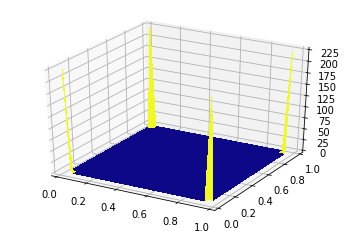

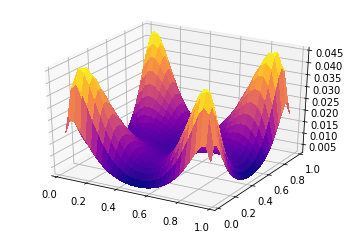

0.00765119717369865


In [14]:
# Her skriver du kode for å løse oppgave c
#
#  1. Hent U0 og beregn U1, U2, U3 ved bruk av dine cholesky- og substitfunksjoner
#  2. Plott U0 og U3 med surfplot-funksjonen

n = 30    
delta_t = 0.01
M = genM(n,delta_t)
L = cholesky(M)

U_0 = genU0(n)
U_00 = U_0[:,0]

for i in range(3):
    U_k = substit(L,U_00)
    U_00 = U_k

U_k = np.reshape(U_k,(n**2,1))    

print(surfplot(U_0))
print(surfplot(U_k))


# For å svare på Kontrollspørsmål 2 
Z3=np.reshape(U_k,(n,n))
print(Z3[14,15])

** SUPPLERTE FUNKSJONER **

In [12]:
def genM(n,Delta_t):
    Delta_x = 1./(n+1)
    r=Delta_t/Delta_x**2
    ee=np.ones((n,))
    B=(1+4*r)*np.diag(ee)-r*np.diag(ee[1:],-1)-r*np.diag(ee[1:],1)
    In=np.diag(ee)
    Fn=np.diag(ee[1:],1)
    Gn=np.diag(ee[1:],-1)
    M=np.kron(In,B)-r*np.kron(Fn,In)-r*np.kron(Gn,In)
    return M


def genU0(n):
    p=n**2/4
    Z0=np.zeros((n,n))
    Z0[n-1,0]=p
    Z0[0,n-1]=p
    Z0[0,0] = p
    Z0[n-1,n-1]=p
    U0 = np.reshape(Z0,(n**2,1))
    return U0

def surfplot(U):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    n2=U.shape[0]
    n=int(np.sqrt(n2))
    if n2 != n**2:
        print('Antall elementer i U må være et kvadrattall\n')
        return
    Delta_x=1/(n+1)
    xx=np.linspace(Delta_x,1-Delta_x,n)
    yy=np.linspace(Delta_x,1-Delta_x,n)
    X,Y = np.meshgrid(xx,yy)
    Z = np.reshape(U,(n,n))
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.plasma,
                       linewidth=1, antialiased=False)
    plt.show()
    return surf
